<a href="https://colab.research.google.com/github/SAISUSHMAS-22/EverydayAI/blob/main/image_cropping_and_quilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install Pillow

In [6]:
pip install rembg

In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from rembg import remove
import os

input_folder = '/content/sample_data/input'
output_folder = '/content/sample_data/output'

os.makedirs(output_folder, exist_ok=True)

input_files = os.listdir(input_folder)

for input_file in input_files:
    input_path = os.path.join(input_folder, input_file)
    output_path = os.path.join(output_folder, f"output_{input_file.split('.')[0]}.png")

    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input_data = i.read()
            output_data = remove(input_data)
            o.write(output_data)

    print(f"Background removed successfully for {input_file}. Output saved to {output_path}")


Background removed successfully for image 5.jpeg. Output saved to /content/sample_data/output/output_image 5.png
Background removed successfully for image 2.jpeg. Output saved to /content/sample_data/output/output_image 2.png
Background removed successfully for image 1.jpeg. Output saved to /content/sample_data/output/output_image 1.png
Background removed successfully for image 7.jpeg. Output saved to /content/sample_data/output/output_image 7.png
Background removed successfully for image 4.jpeg. Output saved to /content/sample_data/output/output_image 4.png
Background removed successfully for image 8.jpeg. Output saved to /content/sample_data/output/output_image 8.png
Background removed successfully for image 3.jpeg. Output saved to /content/sample_data/output/output_image 3.png
Background removed successfully for image 6.jpeg. Output saved to /content/sample_data/output/output_image 6.png


Background removed successfully for image 5.jpeg. Output saved to /content/sample_data/output/output_image 5.png
Background removed successfully for image 2.jpeg. Output saved to /content/sample_data/output/output_image 2.png
Background removed successfully for image 1.jpeg. Output saved to /content/sample_data/output/output_image 1.png
Background removed successfully for image 7.jpeg. Output saved to /content/sample_data/output/output_image 7.png
Background removed successfully for image 4.jpeg. Output saved to /content/sample_data/output/output_image 4.png
Background removed successfully for image 8.jpeg. Output saved to /content/sample_data/output/output_image 8.png
Background removed successfully for image 3.jpeg. Output saved to /content/sample_data/output/output_image 3.png
Background removed successfully for image 6.jpeg. Output saved to /content/sample_data/output/output_image 6.png


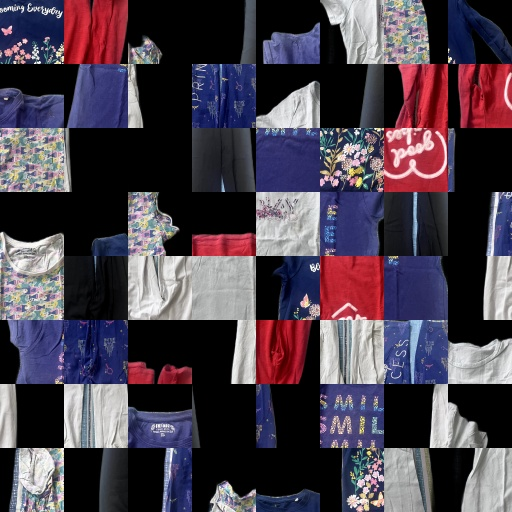

In [11]:
import cv2
import numpy as np
import random
from IPython.display import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from rembg import remove
import os

def crop_into_squares(image, n):
    height, width = image.shape[:2]
    square_size = min(height, width) // n
    squares = []

    for i in range(n):
        for j in range(n):
            y1, y2 = i * square_size, (i + 1) * square_size
            x1, x2 = j * square_size, (j + 1) * square_size
            square = image[y1:y2, x1:x2]
            squares.append(square)

    return squares

def join_randomly(squares, output_size):
    random.shuffle(squares)
    rows = int(np.sqrt(len(squares)))
    cols = int(np.sqrt(len(squares)))
    big_square = np.zeros((output_size, output_size, 3), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            square = cv2.resize(squares[i * cols + j], (output_size // cols, output_size // rows), interpolation=cv2.INTER_AREA)
            big_square[i * (output_size // rows):(i + 1) * (output_size // rows), j * (output_size // cols):(j + 1) * (output_size // cols)] = square

    return big_square

input_folder = '/content/sample_data/input'
output_folder = '/content/sample_data/output'

os.makedirs(output_folder, exist_ok=True)

input_files = os.listdir(input_folder)

for input_file in input_files:
    input_path = os.path.join(input_folder, input_file)
    output_path = os.path.join(output_folder, f"output_{input_file.split('.')[0]}.png")

    with open(input_path, 'rb') as i:
        with open(output_path, 'wb') as o:
            input_data = i.read()
            output_data = remove(input_data)
            o.write(output_data)

    print(f"Background removed successfully for {input_file}. Output saved to {output_path}")

output_images = []
for input_file in input_files:
    output_path = os.path.join(output_folder, f"output_{input_file.split('.')[0]}.png")
    image = cv2.imread(output_path)
    output_images.append(image)

n = 3
output_size = 512

squares = []
for image in output_images:
    cropped_squares = crop_into_squares(image, n)
    squares.extend(cropped_squares)

result_image = join_randomly(squares, output_size)

cv2.imwrite('outputt.jpg', result_image)

Image(filename="outputt.jpg")